<a href="https://colab.research.google.com/github/daken04/Pet-Projects/blob/main/solubility_from_chemical_structure_using_GNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.6 MB/s eta 0:00:00


In [3]:
!pip install rdkit-pypi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 28.6 MB/s eta 0:00:00


In [4]:
import rdkit
from torch_geometric.datasets import MoleculeNet

# Load the ESOL dataset
data = MoleculeNet(root=".", name="ESOL")
data

Processing...
Done!


ESOL(1128)

In [5]:
# Investigating the dataset
print("Dataset type: ", type(data))
print("Dataset features: ", data.num_features)
print("Dataset target: ", data.num_classes)
print("Dataset length: ", data.len)
print("Dataset sample: ", data[0])
print("Sample  nodes: ", data[0].num_nodes)
print("Sample  edges: ", data[0].num_edges)

Dataset type:  <class 'torch_geometric.datasets.molecule_net.MoleculeNet'>
Dataset features:  9
Dataset target:  734
Dataset length:  <bound method InMemoryDataset.len of ESOL(1128)>
Dataset sample:  Data(x=[32, 9], edge_index=[2, 68], edge_attr=[68, 3], smiles='OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O ', y=[1, 1])
Sample  nodes:  32
Sample  edges:  68


/usr/local/lib/python3.10/dist-packages/torch_geometric/data/dataset.py:169: UserWarning: Found floating-point labels while calling `dataset.num_classes`. Returning the number of unique elements. Please make sure that this is expected before proceeding.
  warnings.warn("Found floating-point labels while calling "


In [6]:
data[0].x ## each node has 9 features, there are 32 nodes

tensor([[8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 2, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 0, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 0],
        [6, 0, 2, 5, 0, 0, 2, 0, 0],
        [7, 0, 1, 5, 0, 0, 2, 0, 0],
        [6, 0, 3, 5, 0, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 3, 5, 1, 0, 3, 1, 1],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
        [8, 0, 2, 5, 1, 0, 4, 0, 0],
        [6, 0, 4, 5, 1, 0, 4, 0, 1],
 

In [7]:
data[0].y ## this is solubility value

tensor([[-0.7700]])

In [8]:
data[0].edge_index.T ## information of edges, n1 -> n2

tensor([[ 0,  1],
        [ 1,  0],
        [ 1,  2],
        [ 2,  1],
        [ 2,  3],
        [ 2, 30],
        [ 3,  2],
        [ 3,  4],
        [ 4,  3],
        [ 4,  5],
        [ 4, 26],
        [ 5,  4],
        [ 5,  6],
        [ 6,  5],
        [ 6,  7],
        [ 7,  6],
        [ 7,  8],
        [ 7, 24],
        [ 8,  7],
        [ 8,  9],
        [ 9,  8],
        [ 9, 10],
        [ 9, 20],
        [10,  9],
        [10, 11],
        [11, 10],
        [11, 12],
        [11, 14],
        [12, 11],
        [12, 13],
        [13, 12],
        [14, 11],
        [14, 15],
        [14, 19],
        [15, 14],
        [15, 16],
        [16, 15],
        [16, 17],
        [17, 16],
        [17, 18],
        [18, 17],
        [18, 19],
        [19, 14],
        [19, 18],
        [20,  9],
        [20, 21],
        [20, 22],
        [21, 20],
        [22, 20],
        [22, 23],
        [22, 24],
        [23, 22],
        [24,  7],
        [24, 22],
        [24, 25],
        [2

In [9]:
## converting smiles to RDkit mol

data[0].smiles

'OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)C(O)C3O '

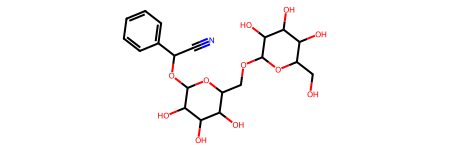

In [10]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

molecule = Chem.MolFromSmiles(data[0].smiles)
molecule

In [11]:
type(molecule)

rdkit.Chem.rdchem.Mol

Whenever we are given a molecule in smiles we can obtain node features and edge information using rdkit,

in the above dataset we are already given this info, so we are not extracting

## Implementing Graph Neural Network

Building a Graph Neural Network works the same way as building a Convolutional Neural Network, we simple add some layers.

The GCN simply extends torch.nn.Module.
GCNConv expects:
- in_channels = Size of each input sample.
- out_channels = Size of each output sample.

We apply three convolutional layers, which means we learn the information about 3 neighbor hops. After that we apply a pooling layer to combine the information of the individual nodes, as we want to perform graph-level prediction.

Always keep in mind that different learning problems (node, edge or graph prediction) require different GNN architectures.

For example for node-level prediction you will often encounter masks. For graph-level predictions on the other hand you need to combine the node embeddings.

In [14]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool as gap, global_max_pool as gmp

embedding_size = 64
first = 1

class GCN(torch.nn.Module):
  def __init__(self):
    super(GCN, self).__init__()
    torch.manual_seed(42)

    # GCN layers
    self.initial_conv = GCNConv(data.num_features,embedding_size)
    self.conv1 = GCNConv(embedding_size,embedding_size)
    self.conv2 = GCNConv(embedding_size,embedding_size)
    self.conv3 = GCNConv(embedding_size,embedding_size)

    # Output Layer
    self.out = Linear(embedding_size*2,1)

  def forward(self,x, edge_index, batch_index):
    # print(x.shape) shape is (number of nodes in batch, features)
    # first Conv Layer
    hidden = self.initial_conv(x,edge_index) ## we send node_embeddings and edge_index(information of edge connections)
    hidden = F.tanh(hidden)

    ## Other conv layers
    hidden = self.conv1(hidden,edge_index)
    hidden = F.tanh(hidden)
    hidden = self.conv2(hidden,edge_index)
    hidden = F.tanh(hidden)
    hidden = self.conv3(hidden,edge_index)
    hidden = F.tanh(hidden)

    # print(batch_index.shape)
    # print(batch_index)
    # print(hidden.shape)
    # print(hidden)

    ## Global pooling for graph embedding(stack different aggregations)
    hidden = torch.cat([gmp(hidden, batch_index),
                            gap(hidden, batch_index)], dim=1)

    out = self.out(hidden)

    return out, hidden


model = GCN()
print(model)
print("Number of parameters: ", sum(p.numel() for p in model.parameters()))


GCN(
  (initial_conv): GCNConv(9, 64)
  (conv1): GCNConv(64, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (out): Linear(in_features=128, out_features=1, bias=True)
)
Number of parameters:  13249


In [15]:
from torch_geometric.data import DataLoader

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0007)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

data_size = len(data)
NUM_GRAPHS_PER_BATCH = 64

train_loader = DataLoader(data[:int(data_size*0.8)], batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)
test_loader = DataLoader(data[int(data_size*0.8):], batch_size=NUM_GRAPHS_PER_BATCH, shuffle=True)

def train(data):
  for batch in train_loader:
    batch.to(device)

    # Reset gradient
    optimizer.zero_grad()

    #forward
    pred, embedding = model(batch.x.float(), batch.edge_index, batch.batch)

    #Calculating loss and gradiends
    loss = loss_fn(pred,batch.y)
    loss.backward()

    # Update using the gradients
    optimizer.step()

  return loss, embedding

print("Starting training...")
losses = []
for epoch in range(2000):
  loss, h = train(data)
  losses.append(loss)
  if epoch%100 == 0:
    print(f"Epoch {epoch} | Train Loss {loss}")

Starting training...
Epoch 0 | Train Loss 11.665946960449219
Epoch 100 | Train Loss 0.8511616587638855
Epoch 200 | Train Loss 1.1238412857055664
Epoch 300 | Train Loss 0.32266855239868164
Epoch 400 | Train Loss 0.23320798575878143
Epoch 500 | Train Loss 0.3807048201560974
Epoch 600 | Train Loss 0.24454888701438904
Epoch 700 | Train Loss 0.059829697012901306
Epoch 800 | Train Loss 0.1726928949356079
Epoch 900 | Train Loss 0.17028503119945526
Epoch 1000 | Train Loss 0.06658972054719925
Epoch 1100 | Train Loss 0.03431527316570282
Epoch 1200 | Train Loss 0.08780476450920105
Epoch 1300 | Train Loss 0.0591948926448822
Epoch 1400 | Train Loss 0.040702711790800095
Epoch 1500 | Train Loss 0.008747102692723274
Epoch 1600 | Train Loss 0.035897642374038696
Epoch 1700 | Train Loss 0.014146042987704277
Epoch 1800 | Train Loss 0.07462453097105026
Epoch 1900 | Train Loss 0.10567226260900497


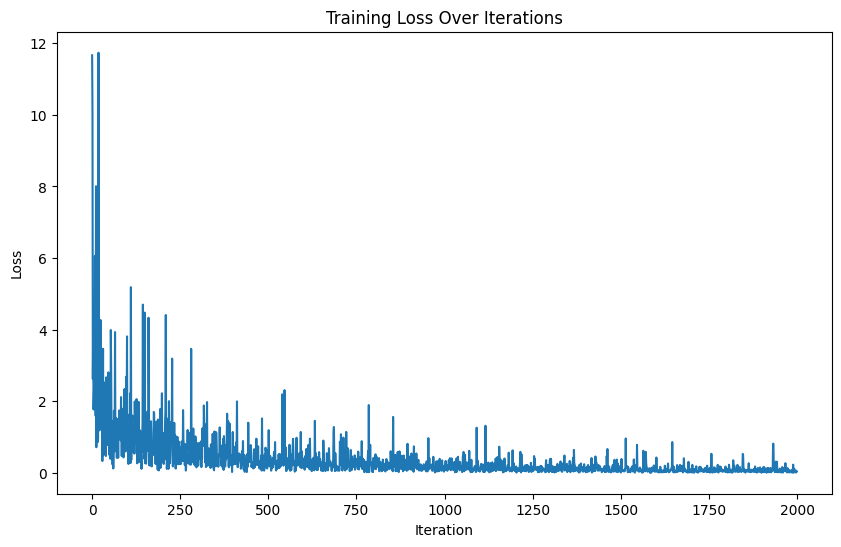

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

losses_float = [float(loss.cpu().detach().numpy()) for loss in losses]
loss_indices = [i for i, l in enumerate(losses_float)]

plt.figure(figsize=(10, 6))
sns.lineplot(x=loss_indices, y=losses_float)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss Over Iterations")
plt.show()

In [18]:
import pandas as pd

# Analyze the results for one batch
test_batch = next(iter(test_loader))
with torch.no_grad():
    test_batch.to(device)
    pred, embed = model(test_batch.x.float(), test_batch.edge_index, test_batch.batch)
    df = pd.DataFrame()
    df["y_real"] = test_batch.y.tolist()
    df["y_pred"] = pred.tolist()
df["y_real"] = df["y_real"].apply(lambda row: row[0])
df["y_pred"] = df["y_pred"].apply(lambda row: row[0])
df

,y_real,y_pred
0,0.940,0.459068
1,-6.237,-2.848811
2,-2.540,-2.422643
3,-5.680,-5.767369
4,-2.460,-1.639810
...,...,...
59,-1.890,-1.472481
60,-2.218,-4.692447
61,-3.583,-1.185204
62,-2.580,-2.422830
